<a href="https://colab.research.google.com/github/Aravind-11/IITM_Saastra/blob/main/Copy_of_Copy_of_rl_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# Stable Baselines only supports tensorflow 1.x for now
%tensorflow_version 1.x
!pip install stable-baselines[mpi]==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 248 kB 4.3 MB/s 
  Attempting uninstall: stable-baselines
    Found existing installation: stable-baselines 2.2.1
    Uninstalling stable-baselines-2.2.1:
      Successfully uninstalled stable-baselines-2.2.1


In [ ]:
import numpy as np
import gym
from random import random 
class Football:  # The class encapsulating the environment
    '''
    Actions [0 : Stand, 1 : Up, 2 : Right, 3 : Down, 4 : Left]
    These are the representing no.s for the mentioned actions
    '''

    def __init__(self, length=30, width=30, goalPositions=[29,15]):
        
        # The player start at random locations
        
        self.pA=[0,15] 
        self.pO=[6,8]
            
        
        self.h = length   # Length of the Football Pitch    
        self.w = width    # Width of the Football Pitch
        
        self.goalPositions = np.array(goalPositions)   # This means that the middle 4 positions at the right and left are the goals
        
     
        
        self.reward = 0                            # Initially the reward is 0
        
        self.observation=np.random.rand(6,)
        self.done = bool(0)                          # This stores whether the game needs to be restart with new position (in the case of a goal)

    def reset(self):
        self.done = bool(0)
        self.reward = 0
        
        self.pA = np.array([np.random.randint(self.h), np.random.randint(self.h)])
        #self.pO=[6,8]
        self.x_traj,self.y_traj=[],[]
        return np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)

    def step(self, action):
        if self.done == bool(1):
          self.reset()
        self.move(first, action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done
        if not done:
            self.current_player_num = (self.current_player_num + 1) % 2   
        return self.observation,self.reward, self.done,{}

    def move(self, player, action):
        opponent = 1 - player
        
        newPosition = self.pA + self.actionToMove(action)
        
        if self.ballOwner is player and self.isInGoal(*newPosition) >= 0:
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        elif self.isInBoard(*newPosition):
            self.positions[player] = newPosition
        if(self.ballOwner!=0):
          self.reward=-1
        return -1



    def isInBoard(self, x, y):
        if(x<0 or x>(30)):
          return 0
        if(y<0 or y>(30)):
          return 0 
        return 1
        

    #def choosePlayer(self):
    #    return np.random.randint(0, 2)
    def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
        plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
        plot_vehicle(x, y, theta, x_traj, y_traj)

class modf_football(Football,gym.Env):
  def __init__(self, length=30, width=30, goalPositions=[29, 15]):
    super().__init__()
    self.observation_space=gym.spaces.Box(low=-30, high=60,
                                        shape=(7,), dtype=np.float32)
    self.reward=0
    self.action_space = gym.spaces.Box(
            low=-2*np.pi, high=2*np.pi, shape=(1,), dtype=np.float32
        )
    self.name='Football'
    self.current_player_num=0
    self.observation=np.random.rand(6,)
    self.pA = np.array([5,15])
    self.Kp_rho = 9
    self.dt=0.01
    self.Kp_alpha = 15
    self.Kp_beta = -3
    self.x_goal = 29
    self.y_goal = 15
    self.theta_goal = 0 
    self.theta_start = 2 * np.pi * random() - np.pi
    
    self.theta = self.theta_start

    self.x_diff = self.x_goal - self.pA[0]
    self.y_diff = self.y_goal - self.pA[1]

    self.x_traj, self.y_traj = [], []
    self.x_start=self.pA[0]
    self.y_start=self.pA[1]
    self.rho = np.hypot(self.x_diff, self.y_diff)
  #modifying the step and move function to get the updated reward system
  def step(self, action):
        
        #print('action',action)
        if self.done == bool(1):
          self.reset()
        
      
        self.move(action)                   # We chose the first player at random
        if self.done == bool(1):
          return self.observation, self.reward, self.done,{}
                   
        return self.observation,self.reward, self.done,{}
  
  def move(self, action):
        self.x_diff = self.x_goal - self.pA[0]
        self.y_diff = self.y_goal - self.pA[1]
        self.rho=np.hypot(self.x_diff,self.y_diff)
        v = self.Kp_rho * self.rho
        #v=9
        #w = self.Kp_alpha * action[0] + self.Kp_beta * action[1]
        #if action[0] > np.pi / 2 or action[0] < -np.pi / 2:
        #    v = -v
        #elif (self.pA[0]==0 and self.pA[1]==29) or (self.pA[1]==0 and self.pA[0]==29):
        #  v=-v
        self.theta = action
        x = self.pA[0] +  v* np.cos(action) * self.dt
        y = self.pA[1] +  v* np.sin(action) * self.dt
        newPosition = np.array([x,y])
        self.x_traj.append(x)
        self.y_traj.append(y)
        
        if (self.pO[0]>self.pA[0]):
          self.pO[0]-=1
        elif (self.pO[0]<self.pA[0]):
          self.pO[0]+=1
        if (self.pO[1]>self.pA[1]):
          self.pO[1]-=1
        elif (self.pO[1]<self.pA[1]):
          self.pO[1]+=1
        
        self.pO[0]=max(self.pO[0],0)
        self.pO[0]=min(self.pO[0],29)
        self.pO[1]=max(self.pO[1],0)
        self.pO[1]=min(self.pO[1],29)
        

        if self.isInGoal(*newPosition) >= 0:
            
            self.done = bool(1)
            return 1 - self.isInGoal(*newPosition)
        # If it's in the board
        if self.isInBoard(*newPosition):
               
            self.reward = -0.1 * ((abs((self.pA[0]-self.goalPositions[0])))+(abs(self.pA[1]-self.goalPositions[1]))) - 0.01*(abs(newPosition[0]-self.pO[0])+abs(newPosition[1]-self.pO[1])) -0.01*(abs(newPosition[0]-5)+abs(newPosition[1]-17))
            self.pA = newPosition

        
        self.observation=np.array((*self.pA,(15-self.pA[0]),(15-self.pA[1]),self.theta,*self.pO)).astype(np.float32)
        return -1
  def isInGoal(self, x, y):
     x_diff = self.x_goal - x
     y_diff = self.y_goal - y
     rho = np.hypot(x_diff, y_diff)
     if(rho<0.001):
       self.done=bool(1)
       self.reward=20  
     return -1
  def transformation_matrix(self,x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])
  def plot_vehicle(self,x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = self.transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,6,10,15],[17,8,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    
    plt.pause(self.dt)
  def render(self,mode="human"):
        

        plt.cla()
        plt.arrow(self.x_start, self.y_start, np.cos(self.theta_start),
                      np.sin(self.theta_start), color='r', width=0.1)
        plt.arrow(self.x_goal, self.y_goal, np.cos(self.theta_goal),
                      np.sin(self.theta_goal), color='g', width=0.1)
        self.plot_vehicle(self.pA[0], self.pA[1], self.theta, self.x_traj, self.y_traj)
  def seed():
      return 0 
  def metadata(x):
      return 0 
  def legal_actions(self):
    return gym.spaces.Discrete(5)
  def close(self):
    pass

env=modf_football(Football,gym.Env)

In [ ]:
from stable_baselines.common.env_checker import check_env

check_env(env, warn=True)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/common/env_checker.py:210: UserWarning: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) cf https://stable-baselines.readthedocs.io/en/master/guide/rl_tips.html
  warnings.warn("We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) "


In [ ]:
from stable_baselines import DQN, PPO2, A2C, ACKTR
from stable_baselines.common.cmd_util import make_vec_env

env = make_vec_env(lambda: env, n_envs=1)

In [ ]:
model = PPO2('MlpPolicy', env, verbose=1).learn(50000)

Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Streaming output truncated to the last 5000 lines.
| n_updates          | 6             |
| policy_entropy     | 1.4216648     |
| policy_loss        | 6.530131e-05  |
| serial_timesteps   | 768           |
| time_elapsed       | 0.944         |
| total_timesteps    | 768           |
| value_loss         | 72.42004      |
--------------------------------------
---------------------------------------
| approxkl           | 0.0001108454   |
| clipfrac           | 0.0            |
| explained_variance | 0.0934         |
| fps                | 969            |
| n_updates          | 7              |
| policy_entropy     | 1.4211409      |
| policy_loss        | -0.00030146167 |
| serial_timesteps   | 896            |
| time_elapsed       | 1.09           |
| total_timesteps    | 896            |
| value_loss         | 212.95337      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0008053002  |
| clipfrac           | 0.001953125   |


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 1
Action:  [-1.020919]
obs= [ 17.832088   26.642456   -2.8320885 -11.642456   -1.020919    6.
   8.       ] reward= [-3.029491] done= False


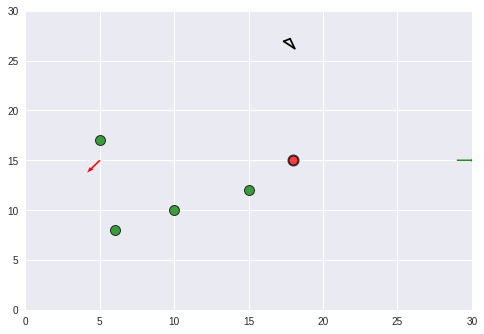

Step 2
Action:  [-1.0292282]
obs= [ 18.580544   25.398272   -3.5805435 -10.398272   -1.0292282   6.
   8.       ] reward= [-2.8006132] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


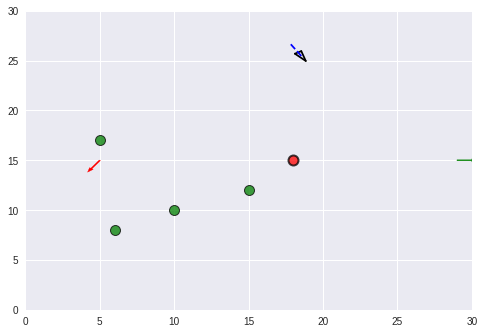

Step 3
Action:  [-1.0360281]
obs= [19.255733  24.258404  -4.2557335 -9.258404  -1.0360281  6.
  8.       ] reward= [-2.5920556] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


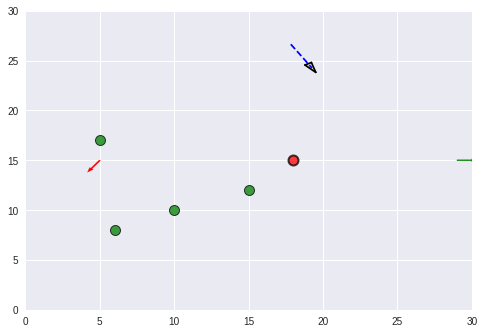

Step 4
Action:  [-1.0388479]
obs= [19.869318  23.215845  -4.869318  -8.215845  -1.0388479  6.
  8.       ] reward= [-2.4019704] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


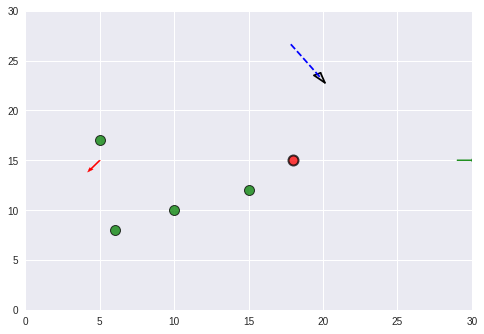

Step 5
Action:  [-1.0453897]
obs= [20.423779  22.25949   -5.4237785 -7.259489  -1.0453897  6.
  8.       ] reward= [-2.228318] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


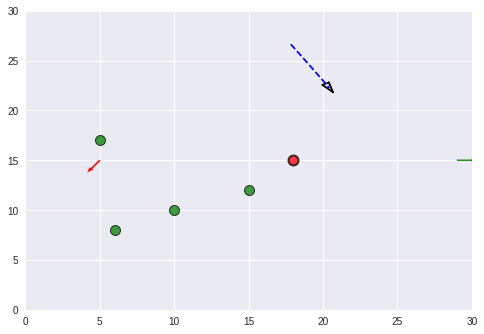

Step 6
Action:  [-1.055325]
obs= [20.922272  21.379635  -5.9222717 -6.379635  -1.055325   6.
  8.       ] reward= [-2.0696092] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


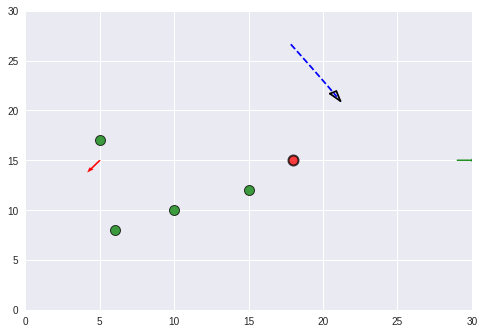

Step 7
Action:  [-1.0626425]
obs= [21.373018  20.570303  -6.3730183 -5.570303  -1.0626425  6.
  8.       ] reward= [-1.9246027] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


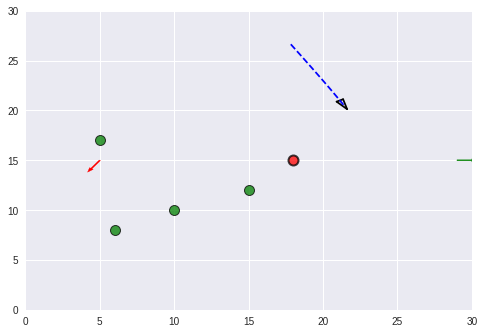

Step 8
Action:  [-1.065015]
obs= [21.78484   19.82672   -6.7848396 -4.8267193 -1.065015   6.
  8.       ] reward= [-1.7919596] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


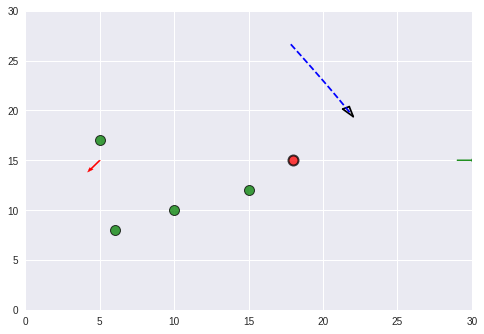

Step 9
Action:  [-1.0634341]
obs= [22.164438  19.143867  -7.1644382 -4.1438675 -1.0634341  6.
  8.       ] reward= [-1.6703541] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


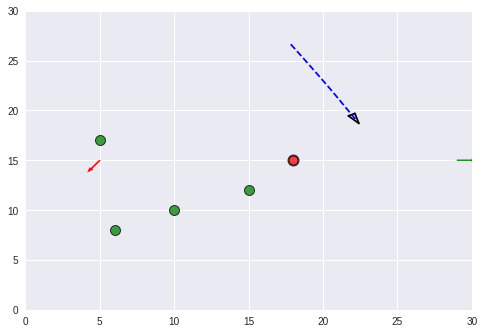

Step 10
Action:  [-1.0582501]
obs= [22.517239  18.516895  -7.5172386 -3.5168953 -1.0582501  6.
  8.       ] reward= [-1.5586256] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


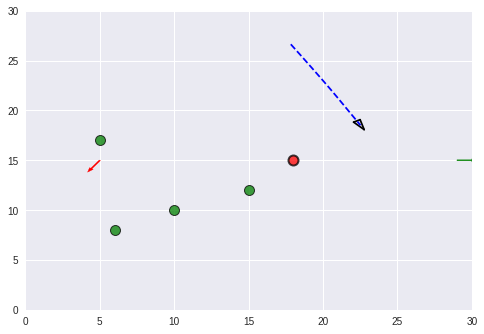

Step 11
Action:  [-1.0487303]
obs= [22.848246  17.941542  -7.8482456 -2.9415417 -1.0487303  6.
  8.       ] reward= [-1.4557614] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


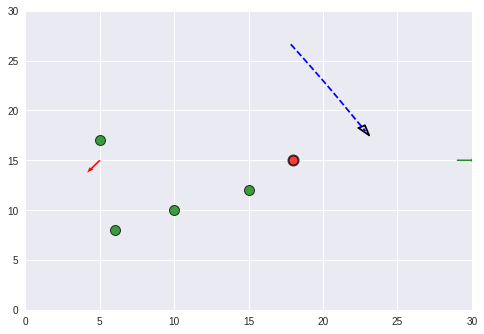

Step 12
Action:  [-1.033183]
obs= [23.162512  17.414417  -8.162512  -2.4144173 -1.033183   6.
  8.       ] reward= [-1.3608682] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


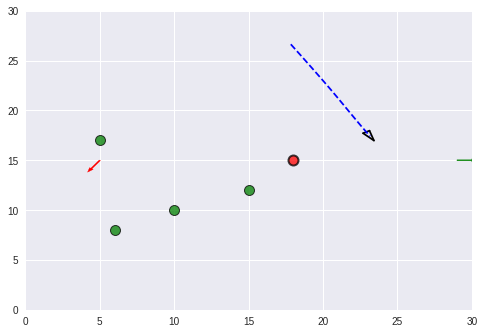

Step 13
Action:  [-1.0086024]
obs= [23.465569  16.933384  -8.465569  -1.933384  -1.0086024  6.
  8.       ] reward= [-1.2745018] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


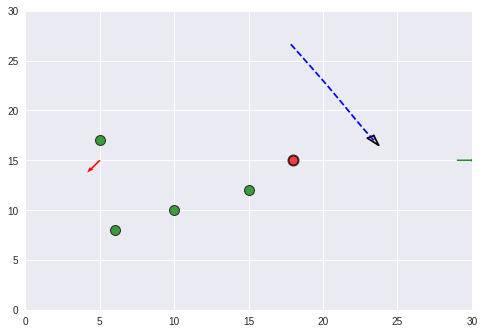

Step 14
Action:  [-0.9701737]
obs= [23.763754  16.498108  -8.763754  -1.4981079 -0.9701737  6.
  8.       ] reward= [-1.2020566] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


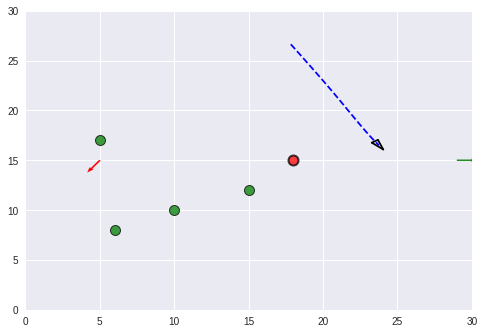

Step 15
Action:  [-0.9113977]
obs= [24.064053  16.110697  -9.064053  -1.1106968 -0.9113977  6.
  8.       ] reward= [-1.1347164] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


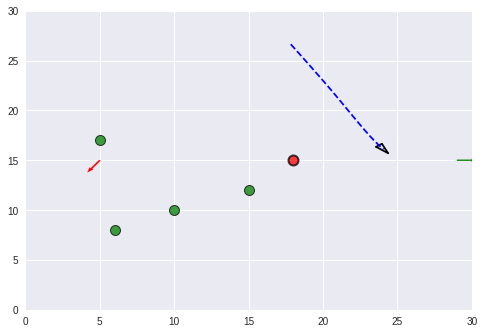

Step 16
Action:  [-0.8261921]
obs= [24.37263   15.775857  -9.372629  -0.775857  -0.8261921  6.
  8.       ] reward= [-1.072117] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


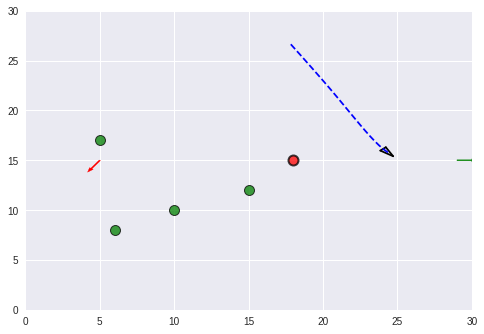

Step 17
Action:  [-0.7137725]
obs= [24.691828   15.499396   -9.691828   -0.49939632 -0.7137725   6.
  8.        ] reward= [-1.0141593] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


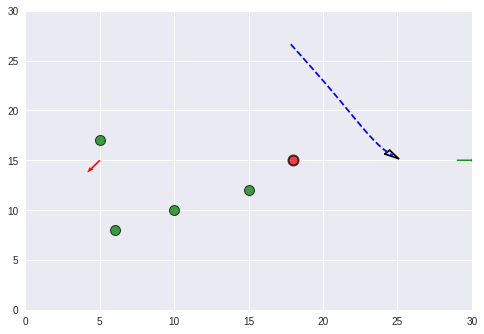

Step 18
Action:  [-0.58351994]
obs= [ 25.01757     15.284337   -10.0175705   -0.28433704  -0.58351994
   6.           8.        ] reward= [-0.9611082] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


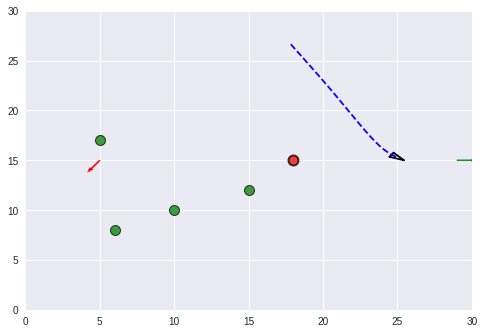

Step 19
Action:  [-0.4533374]
obs= [ 25.340605    15.126962   -10.340605    -0.12696171  -0.4533374
   6.           8.        ] reward= [-0.9134888] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


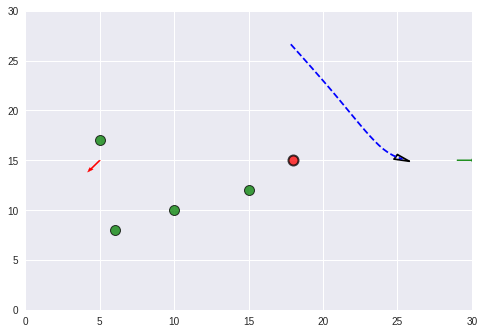

Step 20
Action:  [-0.3398457]
obs= [ 2.5651300e+01  1.5017111e+01 -1.0651300e+01 -1.7110825e-02
 -3.3984569e-01  6.0000000e+00  8.0000000e+00] reward= [-0.8716617] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


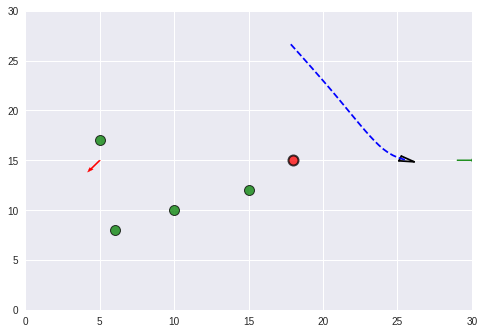

Step 21
Action:  [-0.25010687]
obs= [ 25.94331     14.942515   -10.94331      0.05748463  -0.25010687
   6.           8.        ] reward= [-0.83544725] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


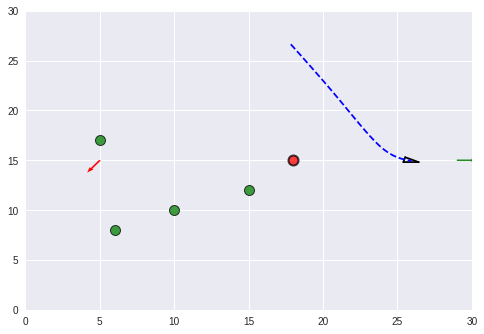

Step 22
Action:  [-0.18263863]
obs= [ 26.213884    14.892541   -11.213884     0.10745907  -0.18263863
   6.           8.        ] reward= [-0.81569517] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


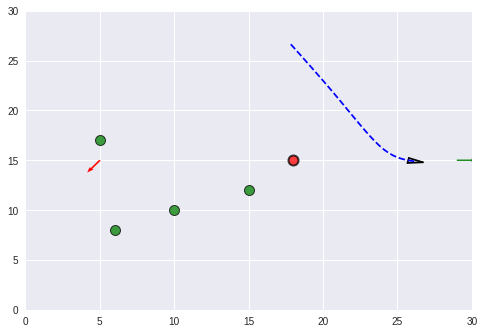

Step 23
Action:  [-0.13268712]
obs= [ 26.462616    14.859343   -11.462616     0.14065742  -0.13268712
   6.           8.        ] reward= [-0.7986098] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


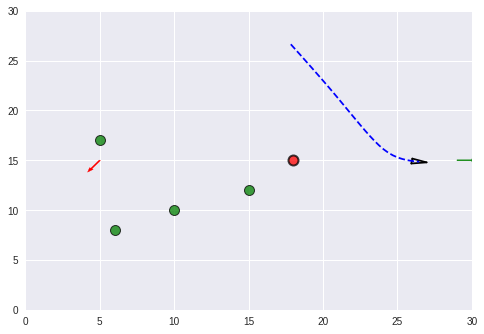

Step 24
Action:  [-0.09558199]
obs= [ 26.690287    14.837515   -11.690287     0.16248512  -0.09558199
   6.           8.        ] reward= [-0.78160983] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


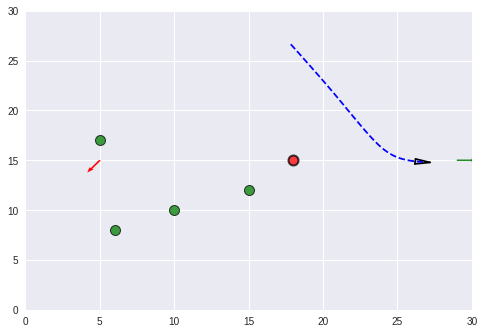

Step 25
Action:  [-0.06770577]
obs= [ 26.898197    14.823417   -11.898197     0.17658329  -0.06770577
   6.           8.        ] reward= [-0.7651838] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


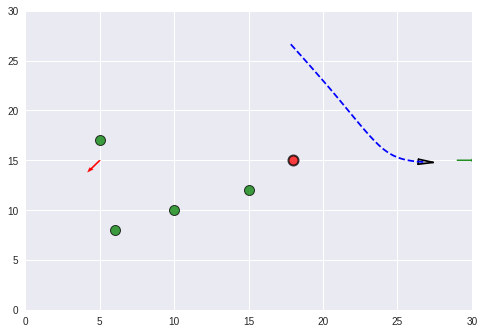

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 26
Action:  [-0.04646676]
obs= [ 27.08782     14.814599   -12.08782      0.18540096  -0.04646676
   6.           8.        ] reward= [-0.74959505] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


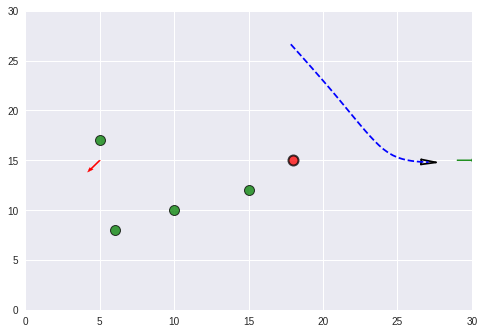

Step 27
Action:  [-0.03004828]
obs= [ 27.260645    14.809404   -12.260645     0.19059563  -0.03004828
   6.           8.        ] reward= [-0.7349709] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


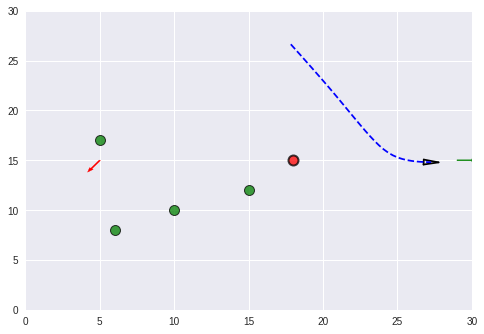

Step 28
Action:  [-0.01717681]
obs= [ 2.7418100e+01  1.4806700e+01 -1.2418100e+01  1.9330025e-01
 -1.7176811e-02  6.0000000e+00  8.0000000e+00] reward= [-0.72135705] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


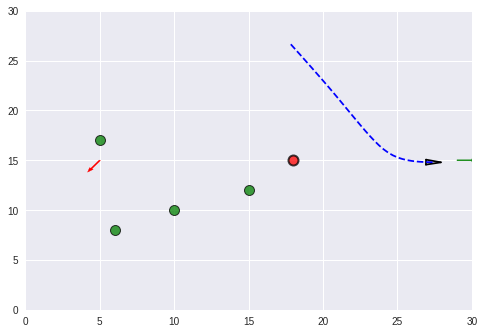

Step 29
Action:  [-0.00695272]
obs= [ 2.7561527e+01  1.4805702e+01 -1.2561527e+01  1.9429779e-01
 -6.9527156e-03  6.0000000e+00  8.0000000e+00] reward= [-0.70875055] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


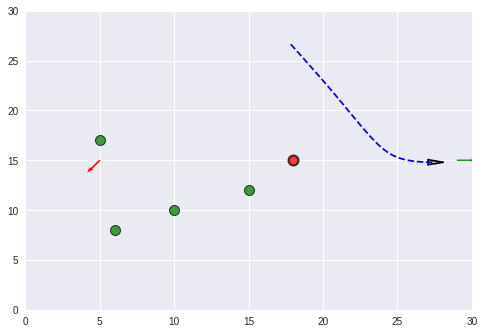

Step 30
Action:  [0.00126857]
obs= [ 2.7692165e+01  1.4805868e+01 -1.2692165e+01  1.9413185e-01
  1.2685684e-03  6.0000000e+00  8.0000000e+00] reward= [-0.69712037] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


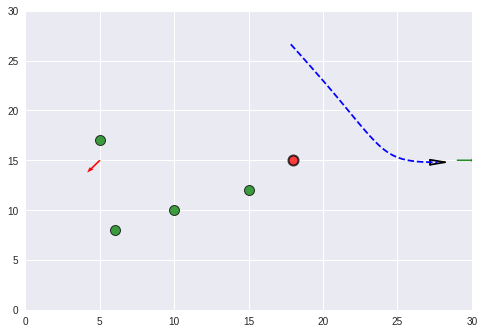

Step 31
Action:  [0.00795349]
obs= [ 2.7811157e+01  1.4806814e+01 -1.2811157e+01  1.9318581e-01
  7.9534855e-03  6.0000000e+00  8.0000000e+00] reward= [-0.68641984] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


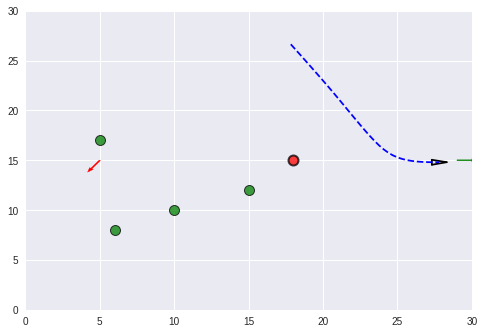

Step 32
Action:  [0.01344616]
obs= [ 2.7919546e+01  1.4808271e+01 -1.2919546e+01  1.9172859e-01
  1.3446156e-02  6.0000000e+00  8.0000000e+00] reward= [-0.6765938] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


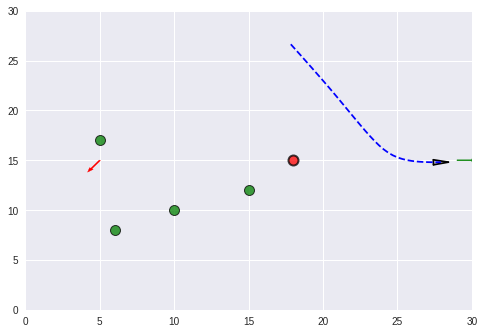

Step 33
Action:  [0.01800118]
obs= [ 2.8018290e+01  1.4810049e+01 -1.3018290e+01  1.8995094e-01
  1.8001184e-02  6.0000000e+00  8.0000000e+00] reward= [-0.66758406] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


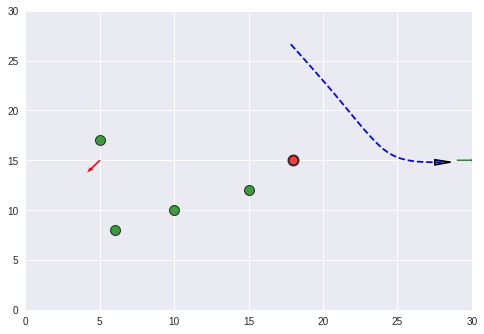

Step 34
Action:  [0.02181124]
obs= [ 2.8108261e+01  1.4812012e+01 -1.3108261e+01  1.8798828e-01
  2.1811241e-02  6.0000000e+00  8.0000000e+00] reward= [-0.6593313] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


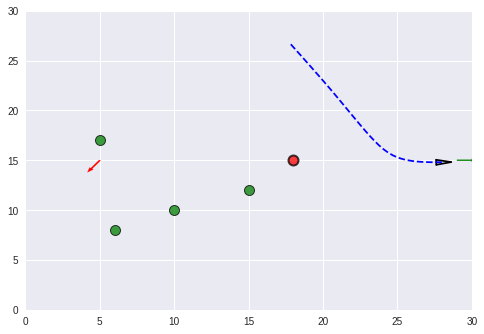

Step 35
Action:  [0.02502342]
obs= [ 2.8190256e+01  1.4814064e+01 -1.3190256e+01  1.8593597e-01
  2.5023419e-02  6.0000000e+00  8.0000000e+00] reward= [-0.65177786] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


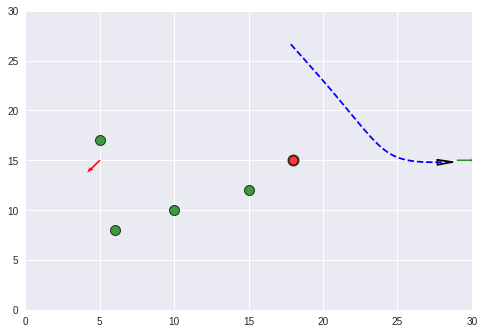

Step 36
Action:  [0.02775122]
obs= [ 2.8265001e+01  1.4816139e+01 -1.3265001e+01  1.8386078e-01
  2.7751222e-02  6.0000000e+00  8.0000000e+00] reward= [-0.644868] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


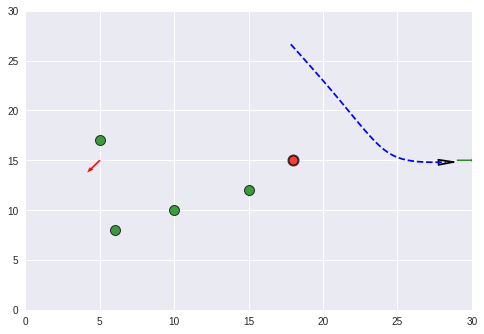

Step 37
Action:  [0.03008278]
obs= [ 28.333158    14.818191   -13.3331585    0.18180943   0.03008278
   6.           8.        ] reward= [-0.6385491] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


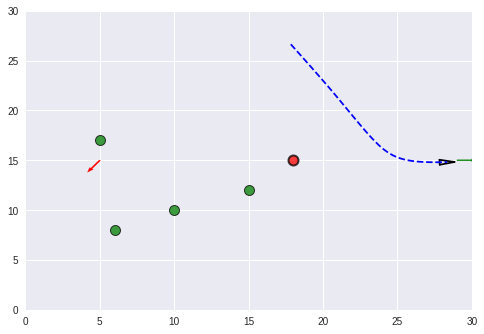

Step 38
Action:  [0.0320883]
obs= [ 28.395332    14.820187   -13.395332     0.17981339   0.0320883
   6.           8.        ] reward= [-0.63277173] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


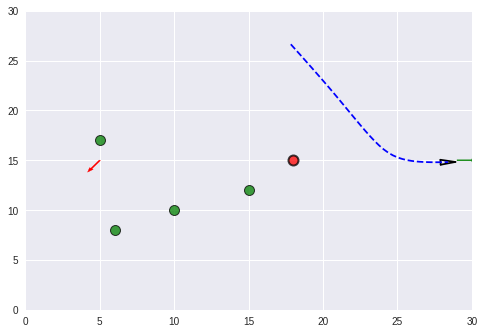

Step 39
Action:  [0.03382279]
obs= [ 28.452076    14.822106   -13.452076     0.17789364   0.03382279
   6.           8.        ] reward= [-0.6274896] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


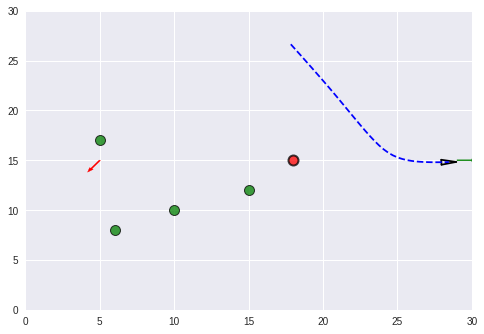

Step 40
Action:  [0.03533113]
obs= [ 28.503891    14.823937   -13.503891     0.17606258   0.03533113
   6.           8.        ] reward= [-0.62265956] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


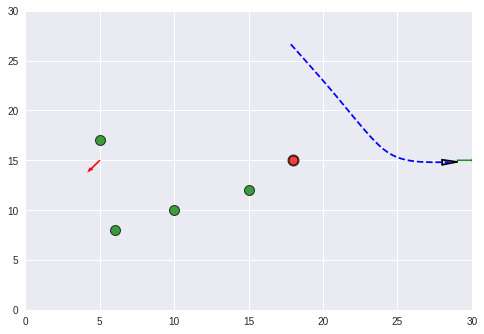

Step 41
Action:  [0.03664924]
obs= [ 28.551237    14.825673   -13.551237     0.1743269    0.03664924
   6.           8.        ] reward= [-0.6182419] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


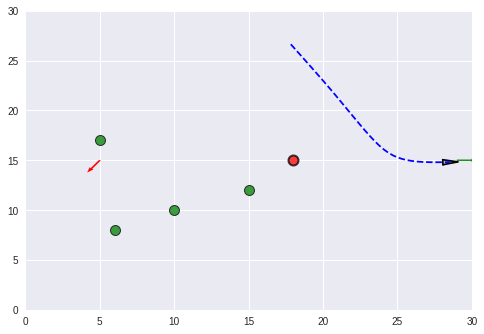

Step 42
Action:  [0.03780599]
obs= [ 28.594536    14.827311   -13.594536     0.17268944   0.03780599
   6.           8.        ] reward= [-0.61419964] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


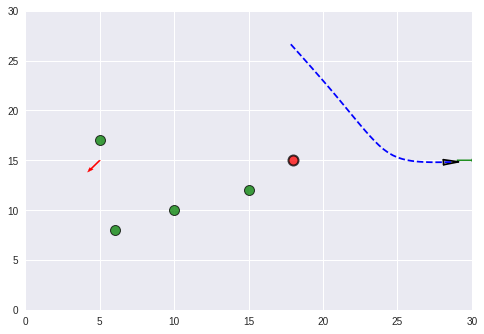

Step 43
Action:  [0.03882568]
obs= [ 28.63417     14.82885    -13.634171     0.17115021   0.03882568
   6.           8.        ] reward= [-0.6104988] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


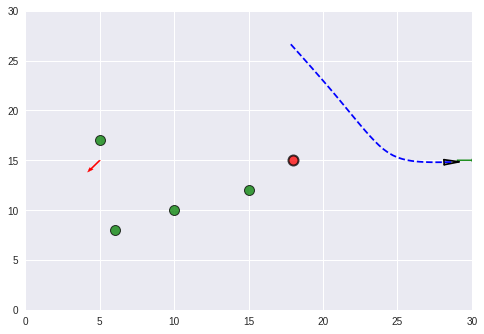

Step 44
Action:  [0.03972832]
obs= [ 28.670492    14.830294   -13.670492     0.16970634   0.03972832
   6.           8.        ] reward= [-0.6071078] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


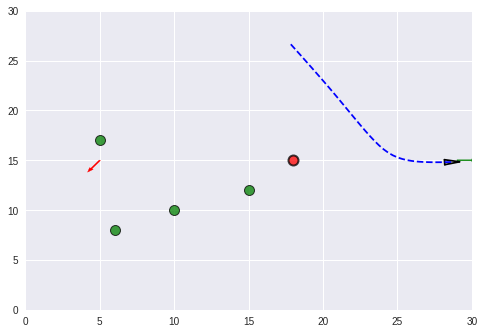

Step 45
Action:  [0.04053023]
obs= [ 28.703823    14.831645   -13.703823     0.16835499   0.04053023
   6.           8.        ] reward= [-0.6039979] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


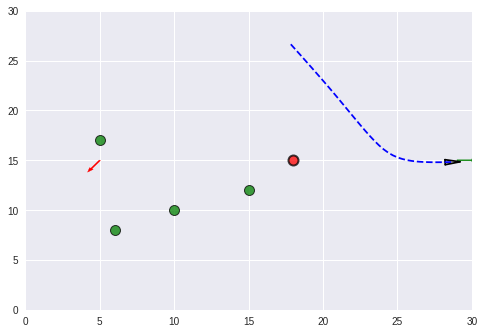

Step 46
Action:  [0.0412463]
obs= [ 28.734459    14.83291    -13.734459     0.16709042   0.0412463
   6.           8.        ] reward= [-0.60114235] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


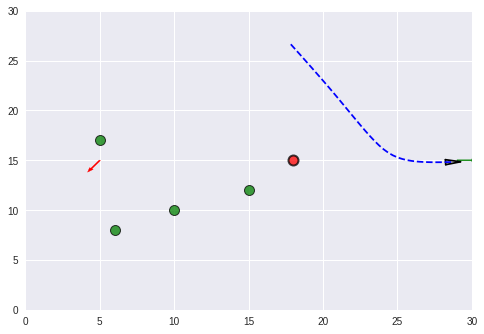

Step 47
Action:  [0.04188707]
obs= [ 28.76267     14.834092   -13.7626705    0.16590786   0.04188707
   6.           8.        ] reward= [-0.5985166] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


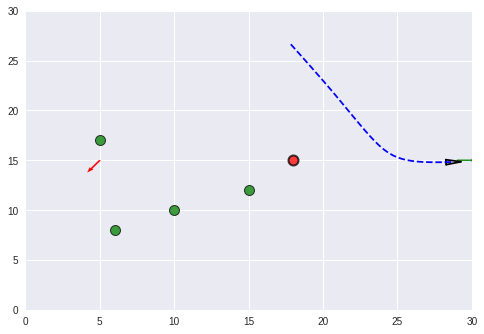

Step 48
Action:  [0.04246343]
obs= [ 28.788708    14.835198   -13.788708     0.1648016    0.04246343
   6.           8.        ] reward= [-0.5960979] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


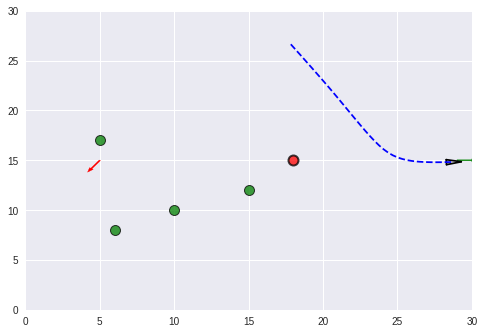

Step 49
Action:  [0.04298428]
obs= [ 28.812801    14.836235   -13.812801     0.16376495   0.04298428
   6.           8.        ] reward= [-0.5938654] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


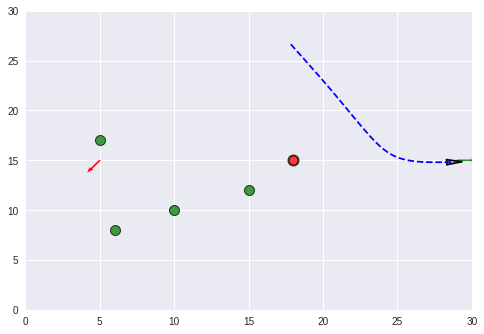

Step 50
Action:  [0.04345644]
obs= [ 28.835165    14.837208   -13.835165     0.1627922    0.04345644
   6.           8.        ] reward= [-0.5917996] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


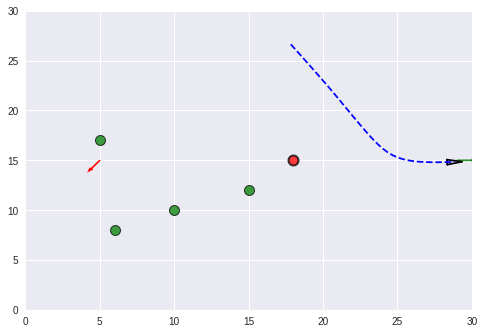

Step 51
Action:  [0.04388662]
obs= [ 28.855995    14.838122   -13.855995     0.16187763   0.04388662
   6.           8.        ] reward= [-0.5898826] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


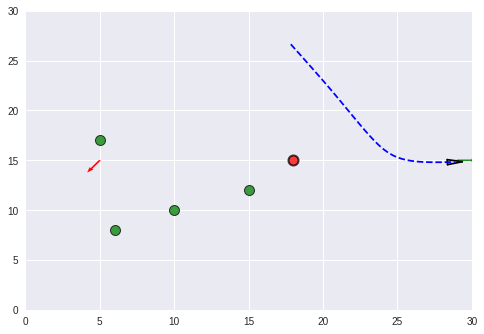

Step 52
Action:  [0.04428101]
obs= [ 28.875475    14.838985   -13.875475     0.16101456   0.04428101
   6.           8.        ] reward= [-0.5880977] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


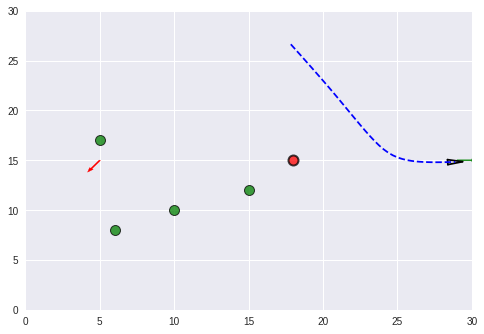

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 53
Action:  [0.04464403]
obs= [ 28.893776    14.839803   -13.893776     0.16019726   0.04464403
   6.           8.        ] reward= [-0.5864295] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


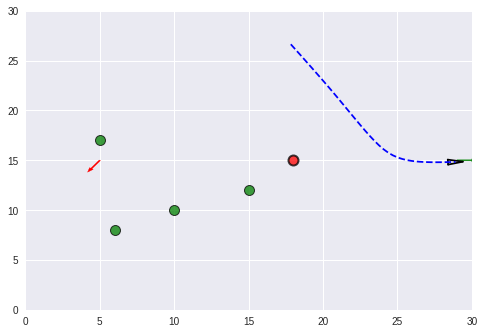

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 54
Action:  [0.04498043]
obs= [ 28.911058    14.840581   -13.911058     0.15941906   0.04498043
   6.           8.        ] reward= [-0.5848633] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


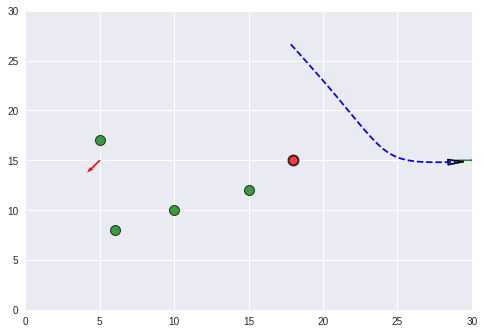

Step 55
Action:  [0.04529285]
obs= [ 28.927471    14.841325   -13.927471     0.1586752    0.04529285
   6.           8.        ] reward= [-0.58338547] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


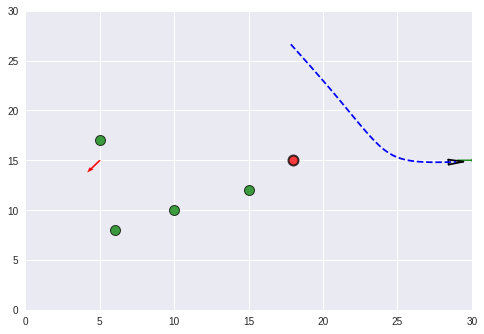

Step 56
Action:  [0.04558649]
obs= [ 28.943157    14.84204    -13.943157     0.15795994   0.04558649
   6.           8.        ] reward= [-0.58198357] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


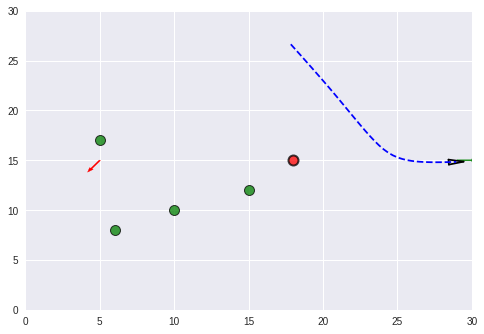

Step 57
Action:  [0.04586379]
obs= [ 28.95825     14.842732   -13.95825      0.15726757   0.04586379
   6.           8.        ] reward= [-0.5806452] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


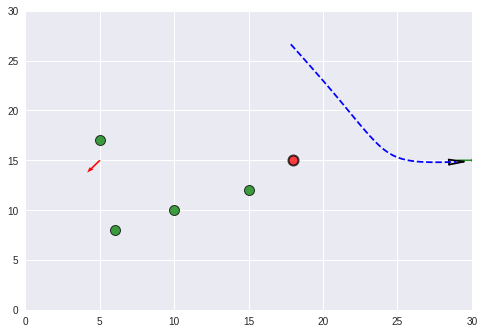

Step 58
Action:  [0.04612755]
obs= [ 28.97288     14.843408   -13.972879     0.15659237   0.04612755
   6.           8.        ] reward= [-0.5793593] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


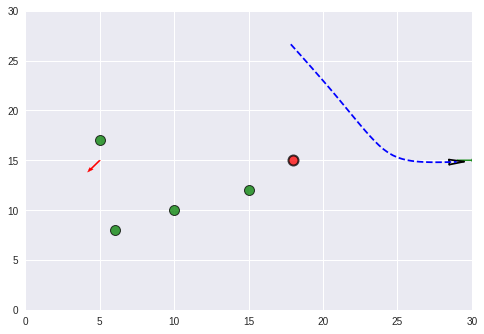

Step 59
Action:  [0.04638025]
obs= [ 28.987167    14.84407    -13.987167     0.15592957   0.04638025
   6.           8.        ] reward= [-0.5781146] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


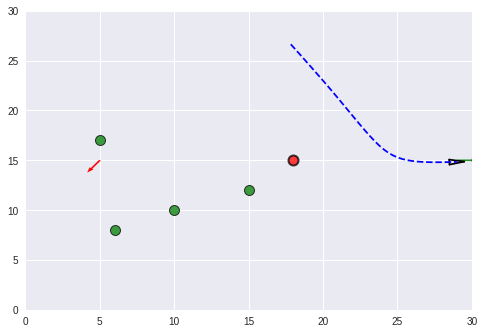

Step 60
Action:  [0.04662456]
obs= [ 29.001234    14.844727   -14.001234     0.15527344   0.04662456
   6.           8.        ] reward= [-0.57690084] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


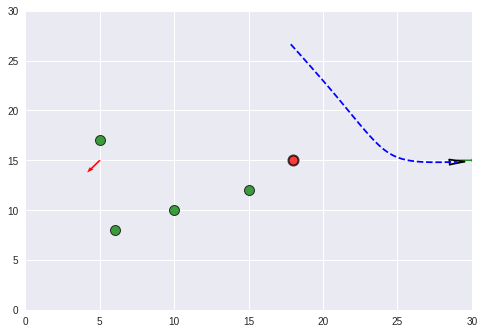

Step 61
Action:  [0.0468626]
obs= [ 29.015194    14.845381   -14.015194     0.15461922   0.0468626
   6.           8.        ] reward= [-0.5759546] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


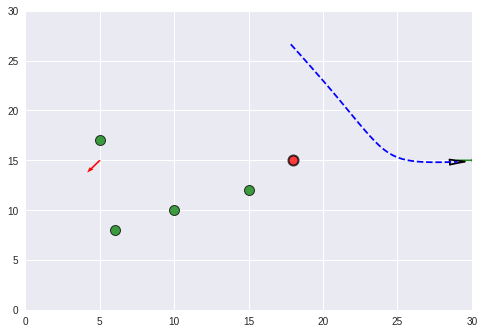

Step 62
Action:  [0.04709646]
obs= [ 29.029161    14.846039   -14.029161     0.15396118   0.04709646
   6.           8.        ] reward= [-0.57756454] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


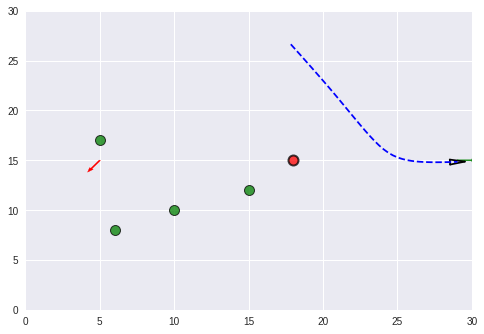

Step 63
Action:  [0.04732807]
obs= [ 29.04325     14.846706   -14.043249     0.15329361   0.04732807
   6.           8.        ] reward= [-0.57917726] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


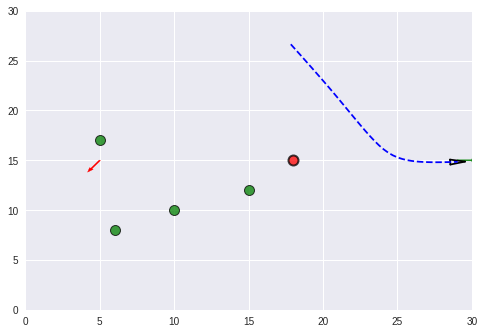

Step 64
Action:  [0.04755869]
obs= [ 29.057568    14.847388   -14.057568     0.15261173   0.04755869
   6.           8.        ] reward= [-0.5808056] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


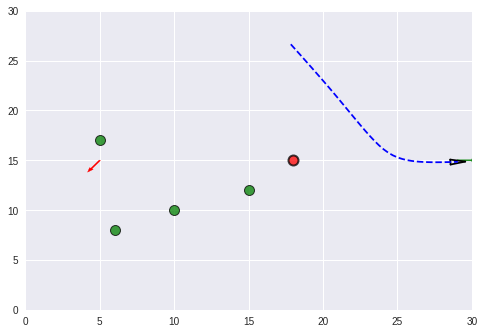

Step 65
Action:  [0.04779061]
obs= [ 29.072231    14.848089   -14.072231     0.15191078   0.04779061
   6.           8.        ] reward= [-0.58246255] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


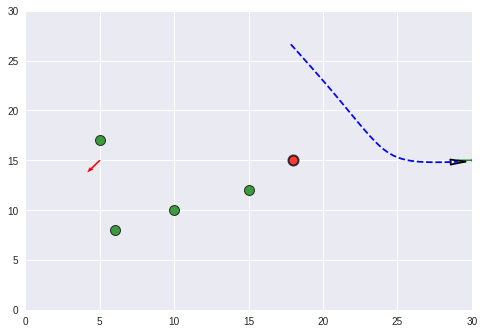

Step 66
Action:  [0.04802644]
obs= [ 29.087353    14.848816   -14.087353     0.15118408   0.04802644
   6.           8.        ] reward= [-0.5841613] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


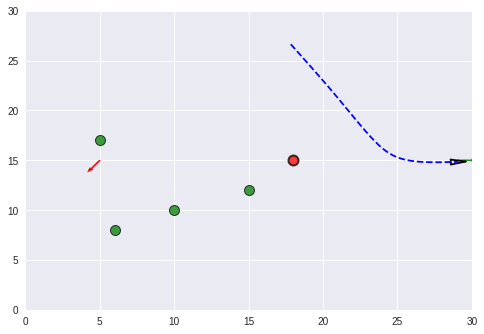

Step 67
Action:  [0.04826674]
obs= [ 29.103048    14.849574   -14.103048     0.15042591   0.04826674
   6.           8.        ] reward= [-0.5859146] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


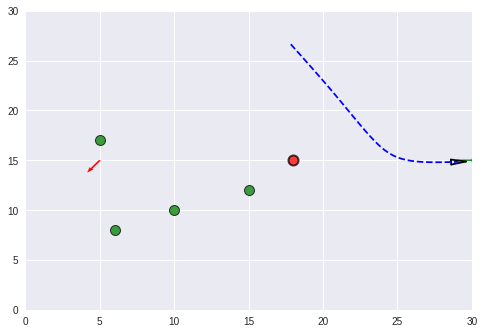

Step 68
Action:  [0.0485131]
obs= [ 29.11944     14.850369   -14.11944      0.14963055   0.0485131
   6.           8.        ] reward= [-0.5877362] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


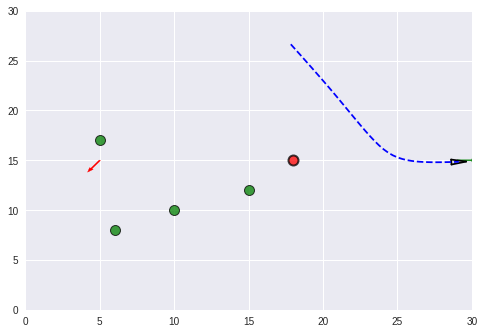

Step 69
Action:  [0.04876799]
obs= [ 29.13665     14.85121    -14.13665      0.14879036   0.04876799
   6.           8.        ] reward= [-0.58964] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


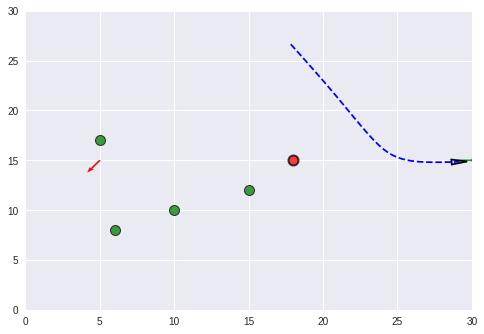

Step 70
Action:  [0.04903162]
obs= [ 29.15481     14.8521     -14.15481      0.14789963   0.04903162
   6.           8.        ] reward= [-0.59164023] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


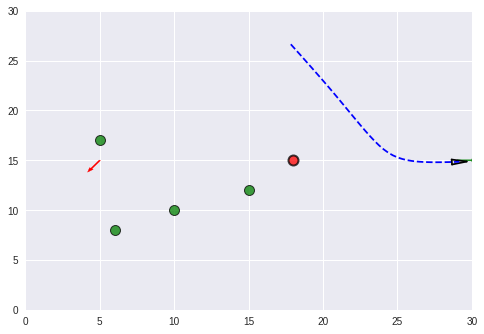

Step 71
Action:  [0.04930677]
obs= [ 29.174055    14.85305    -14.174055     0.14694977   0.04930677
   6.           8.        ] reward= [-0.593752] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


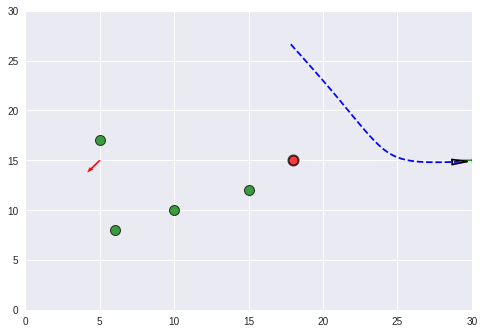

Step 72
Action:  [0.04959382]
obs= [ 29.19453     14.854067   -14.1945305    0.14593315   0.04959382
   6.           8.        ] reward= [-0.59599113] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


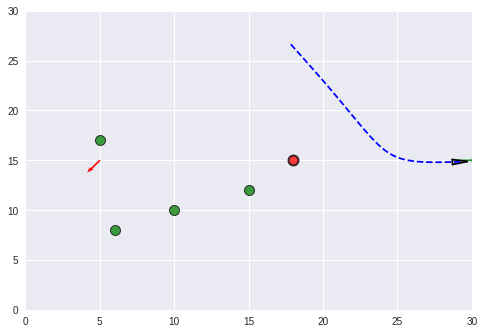

Step 73
Action:  [0.04989487]
obs= [ 29.21639     14.855159   -14.216391     0.1448412    0.04989487
   6.           8.        ] reward= [-0.5983741] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


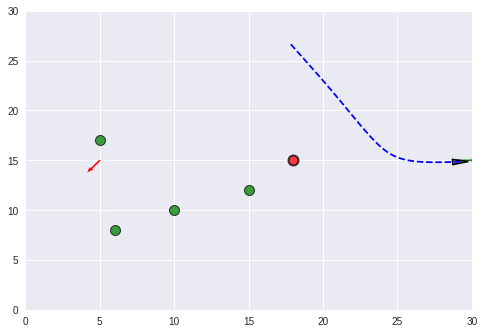

Step 74
Action:  [0.05021096]
obs= [ 29.239796    14.856335   -14.239796     0.14366531   0.05021096
   6.           8.        ] reward= [-0.60091907] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


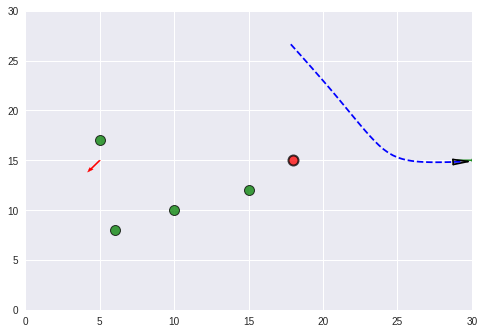

Step 75
Action:  [0.05054469]
obs= [ 29.264921    14.857606   -14.264921     0.14239407   0.05054469
   6.           8.        ] reward= [-0.6036445] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


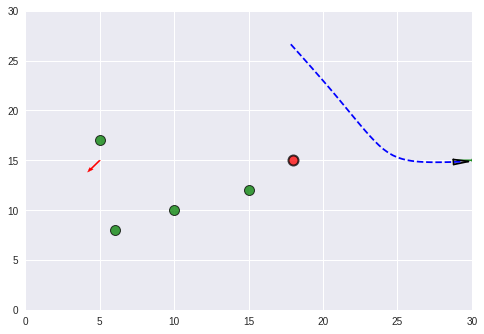

Step 76
Action:  [0.05089573]
obs= [ 29.291954    14.858983   -14.291954     0.14101696   0.05089573
   6.           8.        ] reward= [-0.6065706] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


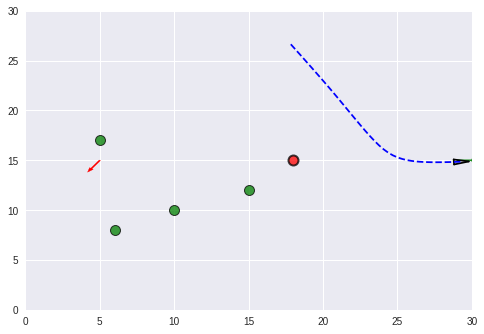

Step 77
Action:  [0.05126644]
obs= [ 29.321096    14.860478   -14.321096     0.1395216    0.05126644
   6.           8.        ] reward= [-0.60971904] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


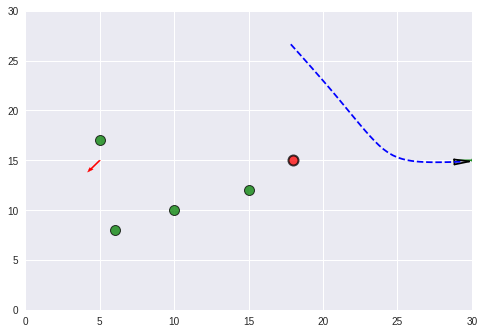

Step 78
Action:  [0.051658]
obs= [ 29.352564    14.862105   -14.352564     0.13789463   0.051658
   6.           8.        ] reward= [-0.61311305] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


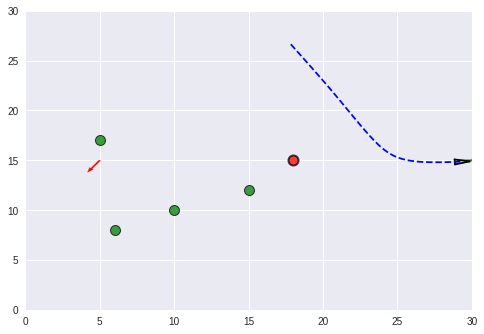

Step 79
Action:  [0.05207138]
obs= [ 29.38659     14.863878   -14.386589     0.13612175   0.05207138
   6.           8.        ] reward= [-0.61677766] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


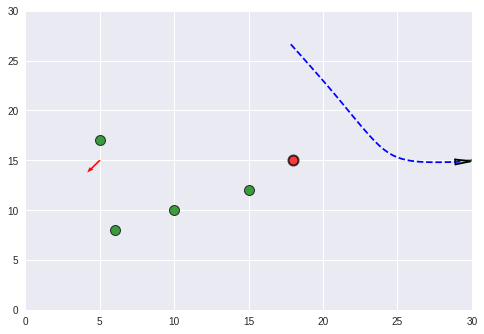

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 80
Action:  [0.05250798]
obs= [ 29.423426    14.865814   -14.423426     0.13418579   0.05250798
   6.           8.        ] reward= [-0.6207396] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


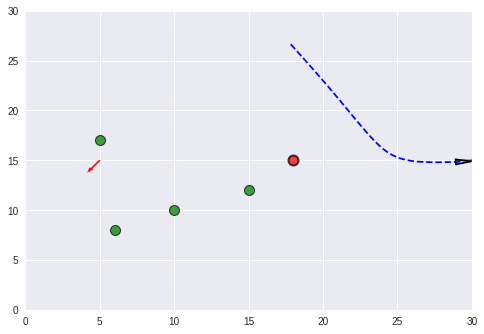

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 81
Action:  [0.05296807]
obs= [ 29.463346    14.86793    -14.4633465    0.13206959   0.05296807
   6.           8.        ] reward= [-0.6250281] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


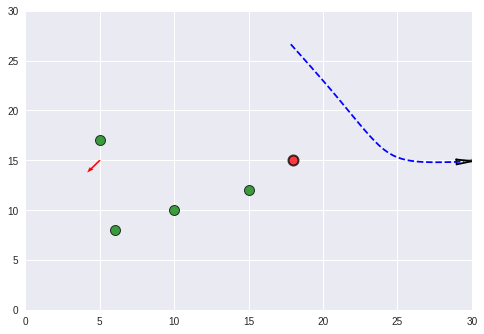

Step 82
Action:  [0.05345257]
obs= [ 29.506647    14.870247   -14.506647     0.12975311   0.05345257
   6.           8.        ] reward= [-0.62967455] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


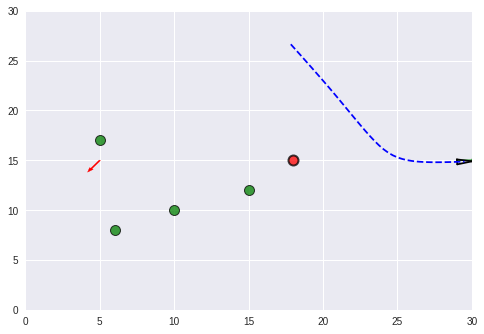

Step 83
Action:  [0.05396223]
obs= [ 29.553648    14.872786   -14.553648     0.12721443   0.05396223
   6.           8.        ] reward= [-0.634713] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


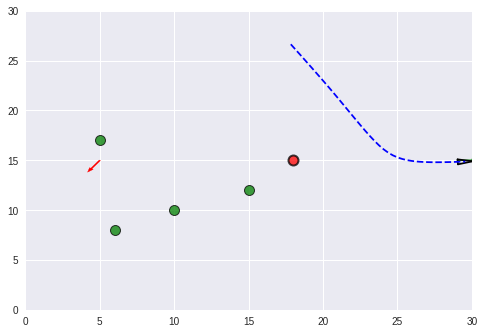

Step 84
Action:  [0.05449675]
obs= [ 29.604698    14.87557    -14.604698     0.1244297    0.05449675
   6.           8.        ] reward= [-0.64018023] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


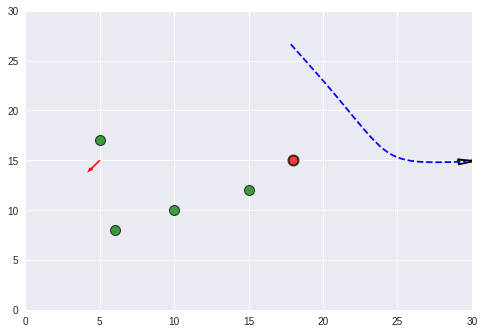

Step 85
Action:  [0.05505672]
obs= [ 29.660177    14.878628   -14.660177     0.12137222   0.05505672
   6.           8.        ] reward= [-0.6461163] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


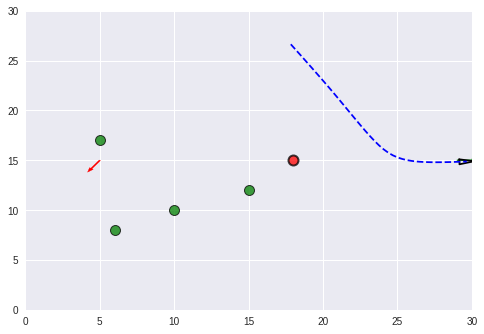

Step 86
Action:  [0.05564161]
obs= [ 29.720495    14.881988   -14.720495     0.11801243   0.05564161
   6.           8.        ] reward= [-0.6525649] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


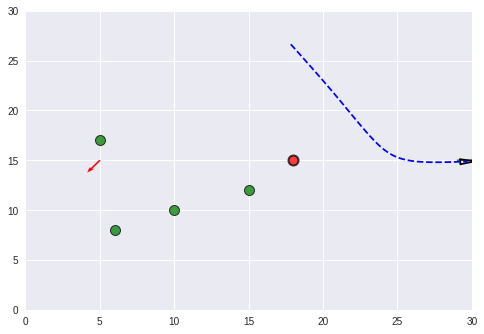

Step 87
Action:  [0.05625055]
obs= [ 29.7861      14.885682   -14.7861       0.11431789   0.05625055
   6.           8.        ] reward= [-0.6595727] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


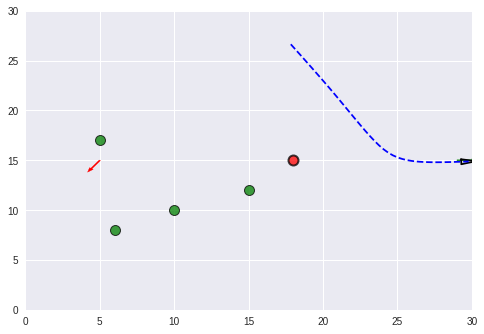

Step 88
Action:  [0.05688242]
obs= [ 29.857477    14.889747   -14.857477     0.11025333   0.05688242
   6.           8.        ] reward= [-0.6671914] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


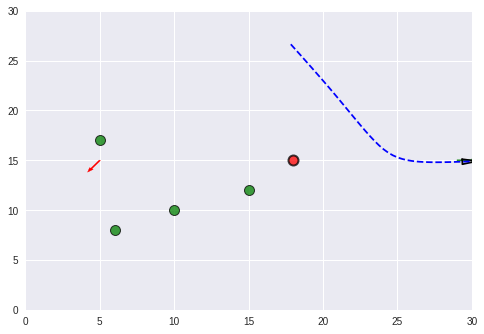

Step 89
Action:  [0.05753624]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.05753624
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


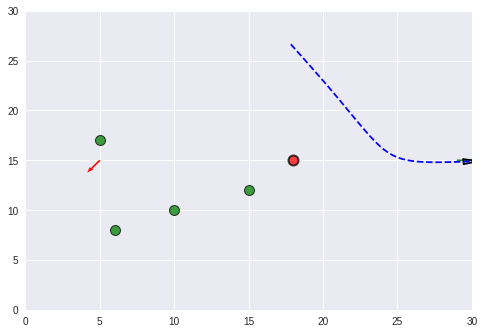

Step 90
Action:  [0.0582096]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0582096
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


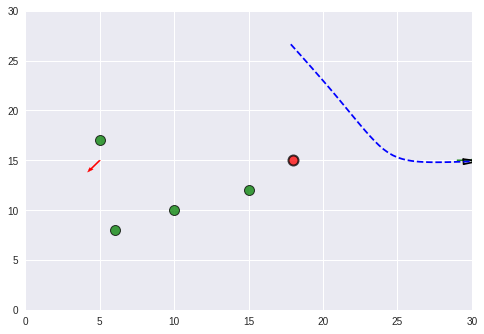

Step 91
Action:  [0.05815268]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.05815268
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


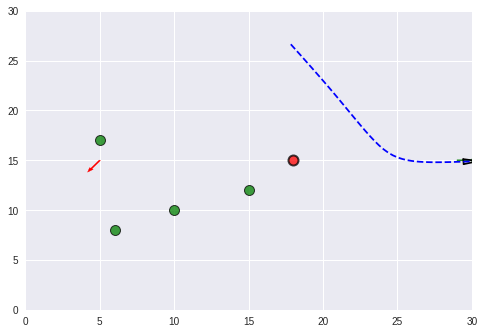

Step 92
Action:  [0.05815748]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.05815748
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


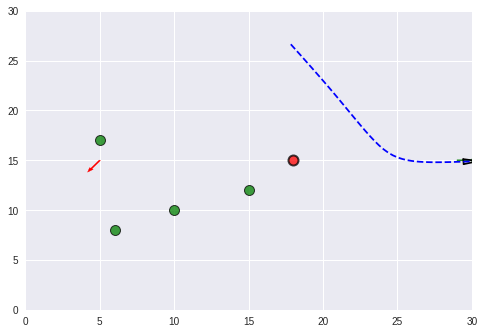

Step 93
Action:  [0.05815704]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.05815704
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


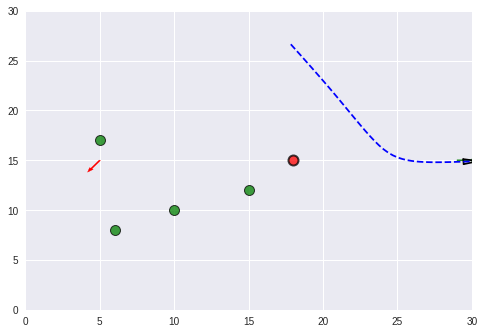

Step 94
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


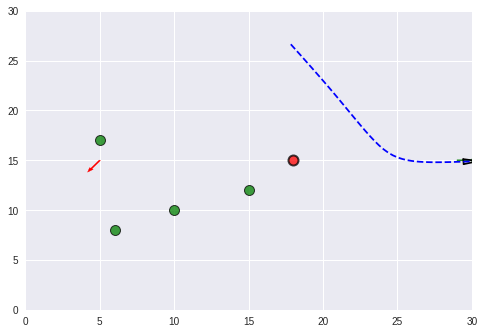

Step 95
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


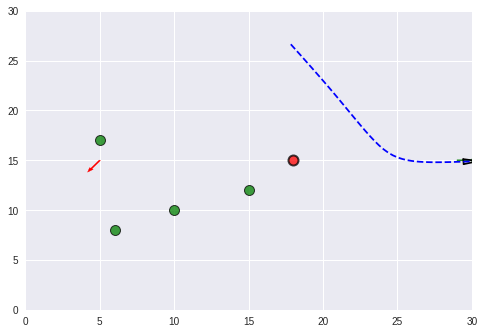

Step 96
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


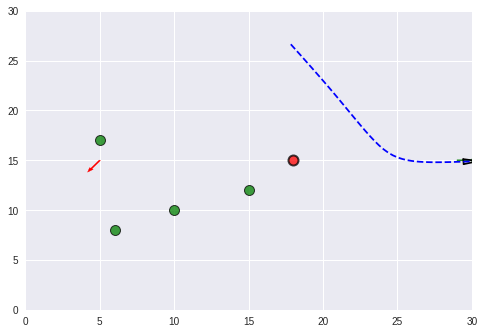

Step 97
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


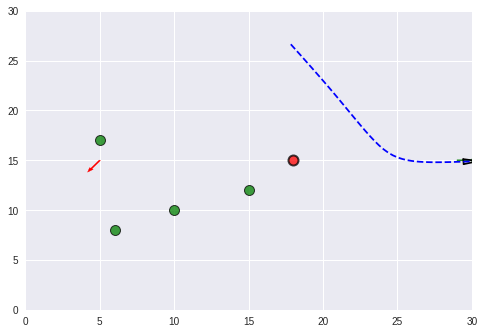

Step 98
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


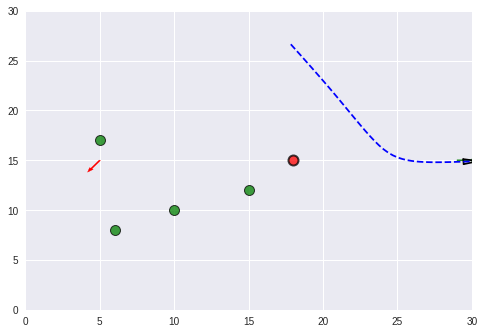

Step 99
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


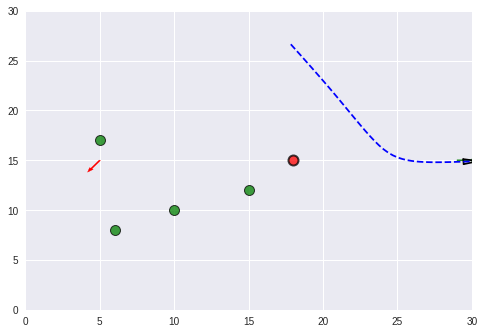

Step 100
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


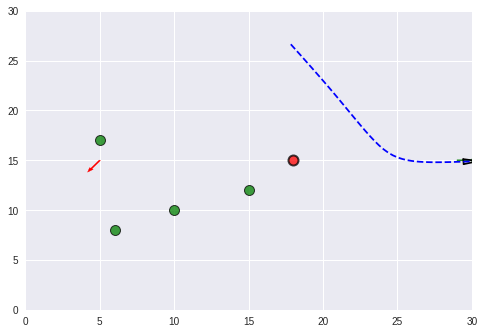

Step 101
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


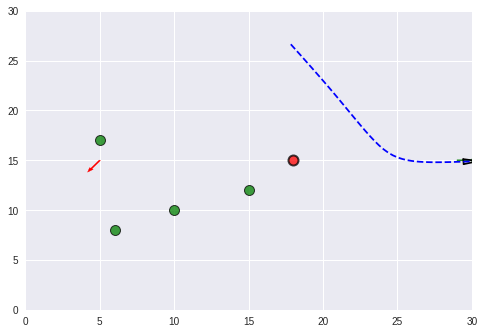

Step 102
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


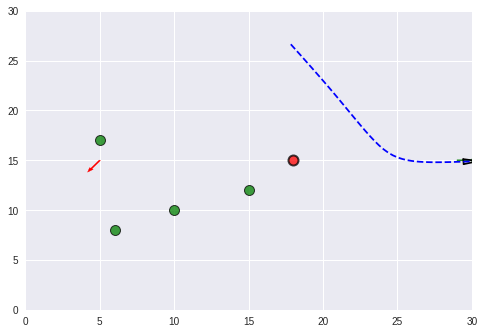

Step 103
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


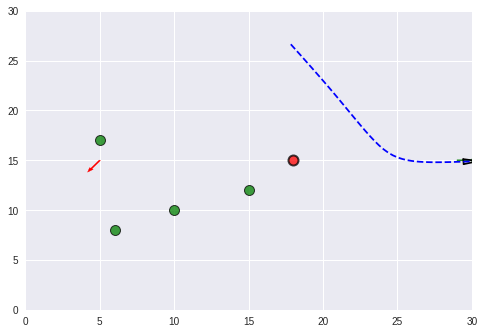

Step 104
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


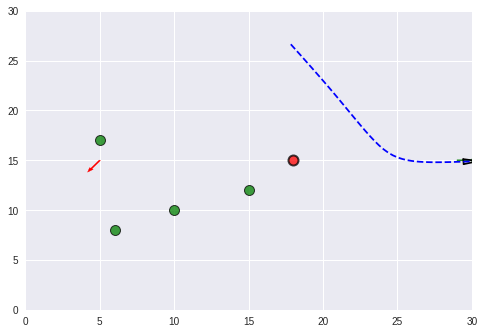

Step 105
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


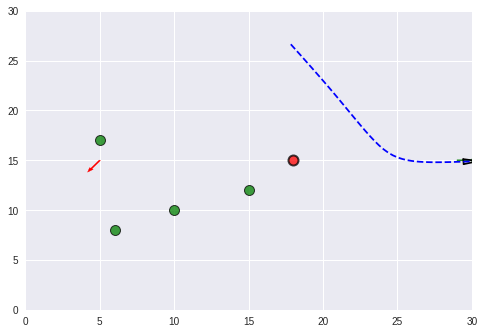

Step 106
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


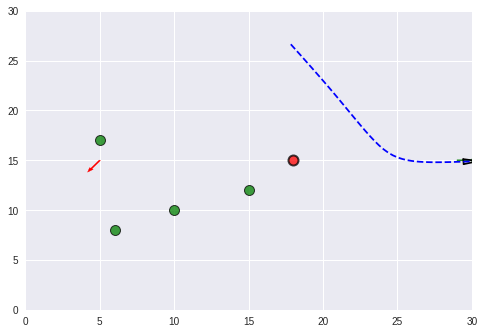

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Step 107
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


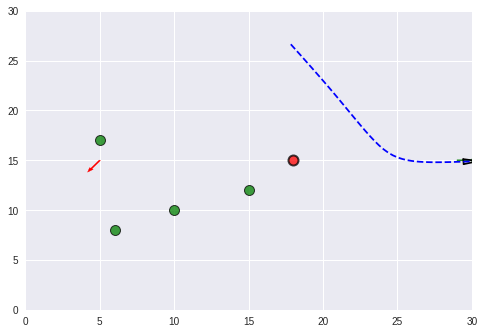

Step 108
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


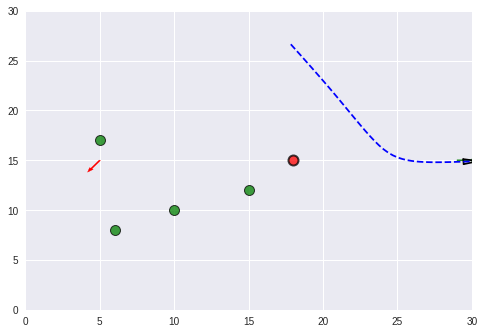

Step 109
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


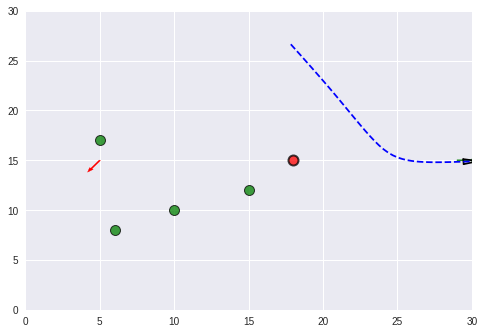

Step 110
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


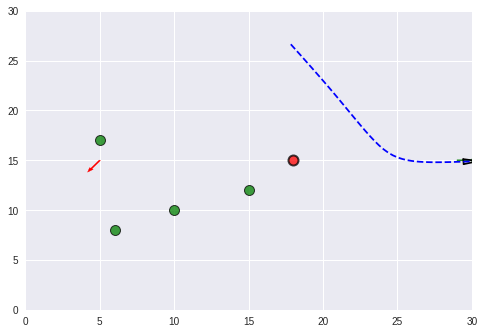

Step 111
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


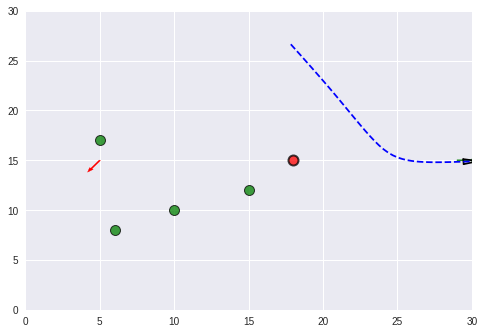

Step 112
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


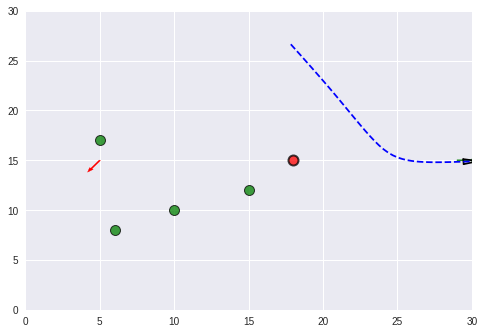

Step 113
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


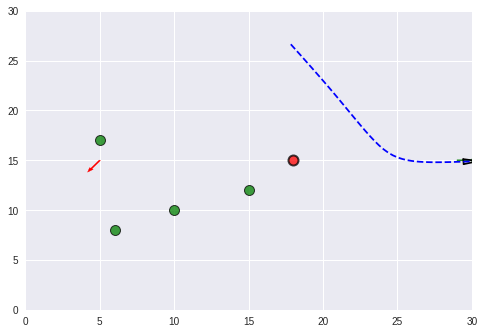

Step 114
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


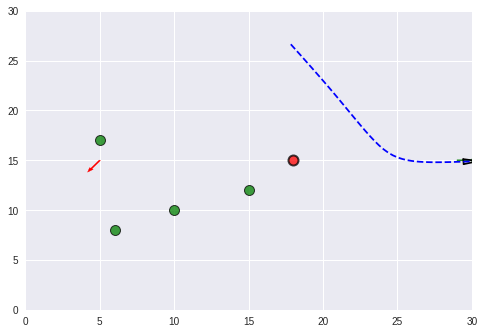

Step 115
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


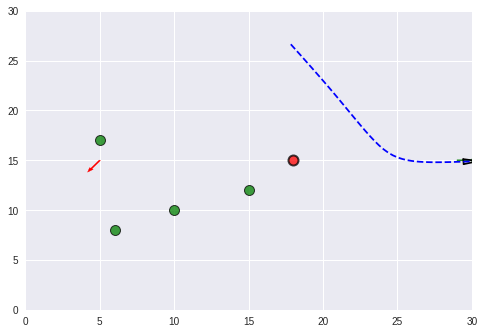

Step 116
Action:  [0.0581571]
obs= [ 29.935156    14.894221   -14.935156     0.10577869   0.0581571
   6.           8.        ] reward= [-0.6754762] done= False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:174: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


KeyboardInterrupt: ignored

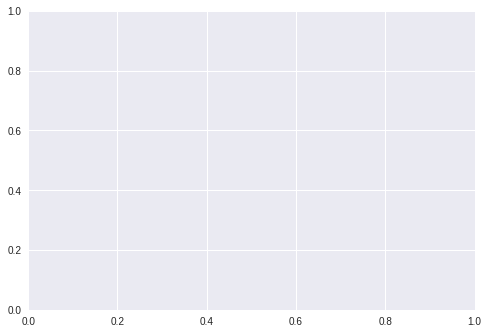

In [ ]:
obs = env.reset()
n_steps = 500
for step in range(n_steps):
  action, _ = model.predict(obs, deterministic=True)
  print("Step {}".format(step + 1))
  print("Action: ", action)
  obs, reward, done, info = env.step(action)
  print('obs=', obs, 'reward=', reward, 'done=', done)
  env.render(mode='console')
  if done:
    # Note that the VecEnv resets automatically
    # when a done signal is encountered
    print("Goal reached!", "reward=", reward)
    break

Initial x: 12.82 m
Initial y: 19.86 m
Initial theta: 1.75 rad

Goal x: 19.00 m
Goal y: 15.00 m
Goal theta: 0.00 rad



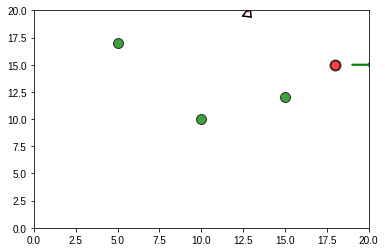

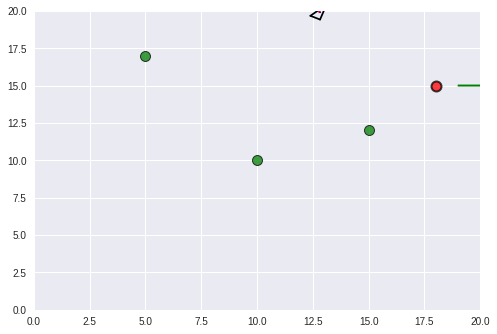

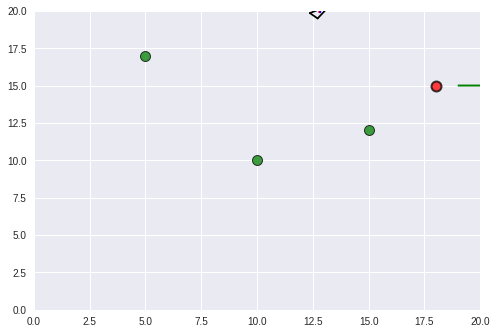

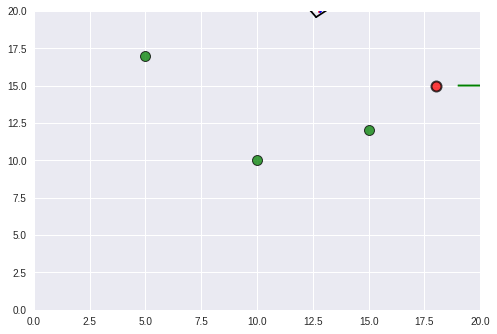

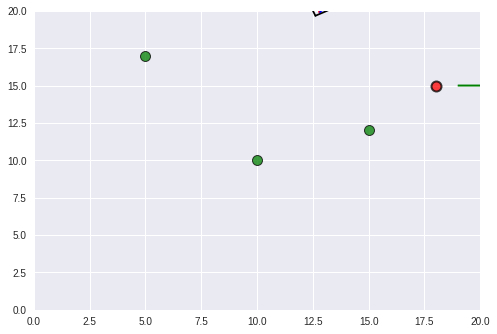

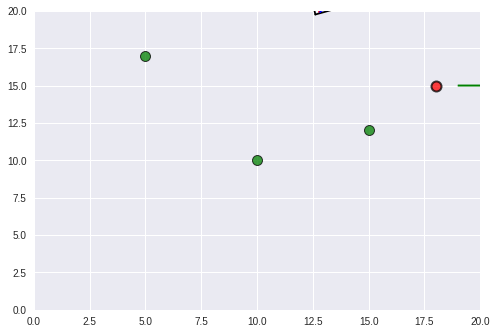

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

# simulation parameters
Kp_rho = 9
Kp_alpha = 15
Kp_beta = -3
dt = 0.01

show_animation = True


def move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal):
    """
    rho is the distance between the robot and the goal position
    alpha is the angle to the goal relative to the heading of the robot
    beta is the angle between the robot's position and the goal position plus the goal angle
    Kp_rho*rho and Kp_alpha*alpha drive the robot along a line towards the goal
    Kp_beta*beta rotates the line so that it is parallel to the goal angle
    """
    x = x_start
    y = y_start
    theta = theta_start

    x_diff = x_goal - x
    y_diff = y_goal - y

    x_traj, y_traj = [], []

    rho = np.hypot(x_diff, y_diff)
    while rho > 0.001:
        x_traj.append(x)
        y_traj.append(y)

        x_diff = x_goal - x
        y_diff = y_goal - y

        # Restrict alpha and beta (angle differences) to the range
        # [-pi, pi] to prevent unstable behavior e.g. difference going
        # from 0 rad to 2*pi rad with slight turn

        rho = np.hypot(x_diff, y_diff) # calculates hypotenuse of x_diff and y_diff. ## reward is also a function of rho 
        alpha = (np.arctan2(y_diff, x_diff) 
                    - theta + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of alpha 
        #alpha=0.1
        #beta=0.2     
        beta = (theta_goal - theta - alpha + np.pi) % (2 * np.pi) - np.pi ## approximated by nn , reward is a function of true value of beta 

        v = Kp_rho * rho
        w = Kp_alpha * alpha + Kp_beta * beta

        if alpha > np.pi / 2 or alpha < -np.pi / 2:
            v = -v

        theta = theta + w * dt
        x = x + 6 * np.cos(theta) * dt
        y = y + 6 * np.sin(theta) * dt

        if show_animation:  # pragma: no cover
            plt.cla()
            plt.arrow(x_start, y_start, np.cos(theta_start),
                      np.sin(theta_start), color='r', width=0.1)
            plt.arrow(x_goal, y_goal, np.cos(theta_goal),
                      np.sin(theta_goal), color='g', width=0.1)
            plot_vehicle(x, y, theta, x_traj, y_traj)


def plot_vehicle(x, y, theta, x_traj, y_traj):  # pragma: no cover
    # Corners of triangular vehicle when pointing to the right (0 radians)
    p1_i = np.array([0.5, 0, 1]).T
    p2_i = np.array([-0.5, 0.25, 1]).T
    p3_i = np.array([-0.5, -0.25, 1]).T

    T = transformation_matrix(x, y, theta)
    p1 = np.matmul(T, p1_i)
    p2 = np.matmul(T, p2_i)
    p3 = np.matmul(T, p3_i)
    
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'k-')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'k-')
    plt.plot([p3[0], p1[0]], [p3[1], p1[1]], 'k-')
    plt.style.use('seaborn')
    plt.scatter([5,10,15],[17,10,12],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
    plt.style.use('seaborn')
    plt.scatter([18],[15],s=100,c='red',edgecolor='black',linewidth=2,alpha=0.75)   
    plt.plot(x_traj, y_traj, 'b--')
    #circle1 = plt.Circle((0, 0), 0.2, color='r')
    #fig, ax = plt.subplots()
    
    # for stopping simulation with the esc key.
    plt.gcf().canvas.mpl_connect('key_release_event',
            lambda event: [exit(0) if event.key == 'escape' else None])
    
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    
    plt.pause(dt)


def transformation_matrix(x, y, theta):
    return np.array([
        [np.cos(theta), -np.sin(theta), x],
        [np.sin(theta), np.cos(theta), y],
        [0, 0, 1]
    ])


def main():

    for i in range(1):
        x_start = 20 * random()
        y_start = 20 * random()
        theta_start = 2 * np.pi * random() - np.pi
        x_goal = 19
        y_goal = 15
        theta_goal = 0 
        print("Initial x: %.2f m\nInitial y: %.2f m\nInitial theta: %.2f rad\n" %
              (x_start, y_start, theta_start))
        print("Goal x: %.2f m\nGoal y: %.2f m\nGoal theta: %.2f rad\n" %
              (x_goal, y_goal, theta_goal))
        move_to_pose(x_start, y_start, theta_start, x_goal, y_goal, theta_goal)


if __name__ == '__main__':
    main()

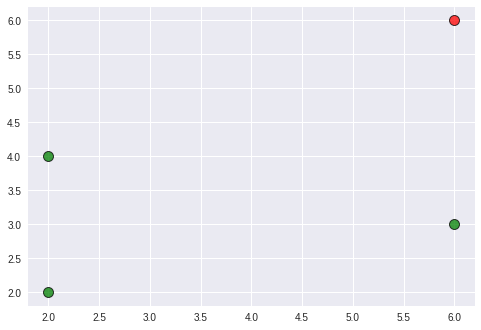

In [ ]:
plt.style.use('seaborn')
plt.scatter([2,3,6],[4,6,8],s=100,c='green',edgecolor='black',linewidth=1,alpha=0.75) 
plt.style.use('seaborn')
plt.scatter([20],[15],s=100,c='red',edgecolor='black',linewidth=1,alpha=0.75) 
